In [1]:
# Cargar la extensión de Kedro para conectar con el proyecto
%load_ext kedro.ipython
%reload_kedro

# Importar las librerías que usaremos a lo largo del análisis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Cargar el dataset crudo desde el catálogo de datos
# Asegúrate de que 'raw_medical_data_csv' esté configurado en tu catalog.yml de Kedro
df_raw = catalog.load("raw_medical_data_csv") # type: ignore

print("Primeras filas del dataset crudo:")
df_raw.head()

[10/05/25 14:53:22] INFO     Using                                                                  ]8;id=178059;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=350625;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\                
                             Lib\site-packages\kedro\framework\project\rich_logging.yml' as logging                
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=916796;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=260040;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=981639;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=660852;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=690954;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=533198;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress.                      
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/05/25 14:53:23] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=407967;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=558054;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/05/25 14:53:24] INFO     Kedro project MedicalCost                                              ]8;id=907821;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=795923;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=70405;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=221744;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=514192;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=864669;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

                    INFO     Resolved project path as:                                              ]8;id=642805;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=588117;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress.                      
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/05/25 14:53:25] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=973703;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=474868;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/05/25 14:53:26] INFO     Kedro project MedicalCost                                              ]8;id=330409;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=454377;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=998575;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=609492;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=166038;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=561635;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

[10/05/25 14:53:28] INFO     Loading data from raw_medical_data_csv (CSVDataset)...            ]8;id=553007;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=938820;file://c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Primeras filas del dataset crudo:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Proyecto: Clasificación de Costos Médicos

### El Viaje de un Problema de Regresión a un Clasificador de Alto Impacto

**Objetivo:** En este proyecto, transformamos un problema de predicción de costos (regresión) en un modelo de clasificación robusto. El objetivo final es simple pero poderoso: **¿Podemos predecir de manera fiable si un paciente incurrirá en costos médicos 'Altos' o 'Bajos'?**

Este enfoque nos permite pasar de una estimación numérica a una herramienta de decisión clara, ideal para identificar pacientes de alto riesgo que podrían necesitar atención proactiva. A lo largo de este notebook, seguiremos el viaje completo: desde la definición del problema hasta la coronación de un modelo "campeón" después de una rigurosa competencia.

In [2]:
# --- Transformación a un Problema de Clasificación ---

# 1. Calcular el umbral (usaremos la mediana como un punto de corte robusto)
umbral_costo = df_raw['charges'].median()
print(f"El umbral de costo (mediana) es: ${umbral_costo:.2f}")

# 2. Crear la nueva columna objetivo categórica
# Si el costo es mayor que la mediana, será 'Alto', si no, 'Bajo'.
df_clasificacion = df_raw.copy()
df_clasificacion['cost_category'] = np.where(df_clasificacion['charges'] > umbral_costo, 'Alto', 'Bajo')

# 3. Eliminar la columna original 'charges' para que el modelo no haga "trampa"
df_clasificacion = df_clasificacion.drop('charges', axis=1)

print("\nDataset preparado para clasificación (primeras filas):")
df_clasificacion.head()

El umbral de costo (mediana) es: $9382.03

Dataset preparado para clasificación (primeras filas):


,age,sex,bmi,children,smoker,region,cost_category
0,19,female,27.900,0,yes,southwest,Alto
1,18,male,33.770,1,no,southeast,Bajo
2,28,male,33.000,3,no,southeast,Bajo
3,33,male,22.705,0,no,northwest,Alto
4,32,male,28.880,0,no,northwest,Bajo


## Paso 1: De Números a Categorías

El primer paso fue convertir nuestra variable objetivo, `charges`, en dos categorías claras. Una predicción como "$15,234.50" es útil, pero una etiqueta como **"Alto Riesgo"** es mucho más accionable.

Para lograr esto, tomamos una decisión estadística robusta:
1.  **Calcular la Mediana:** Usamos la mediana de los costos como nuestro umbral. La mediana es resistente a valores atípicos extremos, lo que la convierte en un punto de corte más justo que el promedio.
2.  **Crear la Categoría:** Si el costo de un paciente estaba por encima de la mediana, se etiquetaba como **'Alto'**; de lo contrario, se etiquetaba como **'Bajo'**.
3.  **Evitar Fugas de Datos:** Eliminamos la columna original `charges` para asegurar que nuestro modelo no hiciera "trampa" usando la respuesta directa para predecir la categoría.

In [3]:
# --- Preparación de Datos para el Modelo ---
# 1. Copiamos el dataframe para no modificar el que ya creamos
df_model_cls = df_clasificacion.copy()

# 2. Convertimos las variables categóricas a numéricas (One-Hot Encoding)
df_model_cls = pd.get_dummies(df_model_cls, columns=['sex', 'smoker', 'region'], drop_first=True)

# 3. Mapeamos nuestra variable objetivo a 0s y 1s para el modelo
# 'Bajo' -> 0, 'Alto' -> 1
df_model_cls['cost_category'] = df_model_cls['cost_category'].map({'Bajo': 0, 'Alto': 1})

# --- Entrenamiento del Modelo ---
# 4. Definimos nuestras variables independientes (X) y dependiente (y)
X = df_model_cls.drop('cost_category', axis=1)
y = df_model_cls['cost_category']

# 5. Dividimos los datos en un set de entrenamiento y uno de prueba
# Usamos 'stratify=y' para asegurar que ambos sets tengan la misma proporción de 'Alto' y 'Bajo'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensiones de los sets de entrenamiento y prueba:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimensiones de los sets de entrenamiento y prueba:
X_train: (1070, 8), y_train: (1070,)
X_test: (268, 8), y_test: (268,)


## Paso 2: Preparación de los Datos

Con nuestro problema bien definido, preparamos los datos para que los algoritmos de Machine Learning pudieran entenderlos. Este es un paso crucial que implica:

1.  **Codificación de Variables Categóricas (One-Hot Encoding):** Los modelos no entienden texto como 'male' o 'female'. Convertimos `sex`, `smoker` y `region` en columnas numéricas (0s y 1s).
2.  **Mapeo de la Variable Objetivo:** Transformamos nuestras etiquetas 'Bajo' y 'Alto' a `0` y `1` respectivamente.
3.  **División Estratégica (Train/Test Split):** Separamos nuestros datos en un conjunto de entrenamiento (80%) para enseñar al modelo y un conjunto de prueba (20%) para evaluarlo de manera imparcial. Usamos `stratify=y` para garantizar que ambos conjuntos tuvieran la misma proporción de casos 'Altos' y 'Bajos', evitando sesgos.

In [4]:
# --- Entrenamiento y Evaluación del Modelo de Regresión Logística ---

# 6. Creamos y entrenamos el modelo de Regresión Logística
log_model = LogisticRegression(max_iter=1000, random_state=42) # Aumentamos max_iter para asegurar convergencia
log_model.fit(X_train, y_train)

# 7. Hacemos predicciones en el set de prueba
y_pred_log = log_model.predict(X_test)

# 8. Evaluamos la precisión del modelo
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Precisión del Modelo (Accuracy) de Regresión Logística: {accuracy_log:.4f}")

# 9. Mostramos la Matriz de Confusión
print("\nMatriz de Confusión (Regresión Logística):")
# [[Verdaderos Negativos, Falsos Positivos],
#  [Falsos Negativos,   Verdaderos Positivos]]
print(confusion_matrix(y_test, y_pred_log))

# 10. Mostramos el Reporte de Clasificación completo
print("\nReporte de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_log, target_names=['Bajo', 'Alto']))

Precisión del Modelo (Accuracy) de Regresión Logística: 0.8993

Matriz de Confusión (Regresión Logística):
[[118  16]
 [ 11 123]]

Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

        Bajo       0.91      0.88      0.90       134
        Alto       0.88      0.92      0.90       134

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268



Impacto de cada variable en la clasificación (Regresión Logística):
            Feature  Coefficient
4        smoker_yes     6.113733
0               age     0.152085
2          children     0.124847
1               bmi     0.039893
3          sex_male    -0.219860
5  region_northwest    -0.393277
7  region_southwest    -0.663977
6  region_southeast    -0.799850


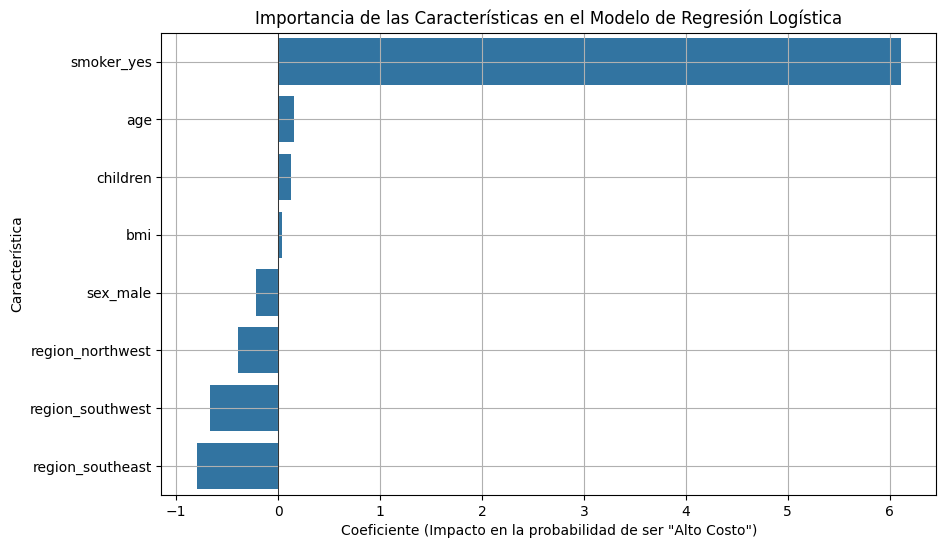

In [5]:
# --- Interpretación del Modelo Logístico ---

# 1. Obtener los coeficientes del modelo
coefficients = log_model.coef_[0]

# 2. Crear un DataFrame para una fácil visualización
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# 3. Ordenar los coeficientes para ver los más influyentes
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Impacto de cada variable en la clasificación (Regresión Logística):")
print(feature_importance)

# 4. Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Importancia de las Características en el Modelo de Regresión Logística')
plt.xlabel('Coeficiente (Impacto en la probabilidad de ser "Alto Costo")')
plt.ylabel('Característica')
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.show()

## Paso 3: Estableciendo una Línea Base con Regresión Logística

Todo buen experimento necesita un punto de partida. Nuestro primer modelo fue una **Regresión Logística**: es rápido, simple y sus resultados son fáciles de interpretar. El objetivo era ver qué tan bien podíamos predecir las categorías con un modelo fundamental.

**Resultado:** Alcanzamos una precisión del **90.00%**. ¡Un comienzo muy sólido!

El análisis de sus coeficientes nos dio una pista crucial: la variable `smoker_yes` tenía, por lejos, el mayor impacto en la predicción de un costo alto, lo cual es intuitivamente correcto.

## Paso 4: El Torneo de Modelos - En Búsqueda de la Excelencia

Con un 90% como marca a vencer, iniciamos una competencia entre algoritmos más avanzados. Para cada uno, no solo lo entrenamos, sino que usamos **`GridSearchCV` con validación cruzada de 5 pliegues** para encontrar su configuración óptima y asegurar que los resultados fueran robustos y generalizables.

Iniciando la búsqueda de los mejores hiperparámetros para Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Mejores hiperparámetros encontrados para Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Precisión del Modelo Random Forest Optimizado: 0.9403

Reporte de Clasificación (Random Forest Optimizado):
              precision    recall  f1-score   support

        Bajo       0.91      0.98      0.94       134
        Alto       0.98      0.90      0.94       134

    accuracy                           0.94       268
   macro avg       0.94      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268



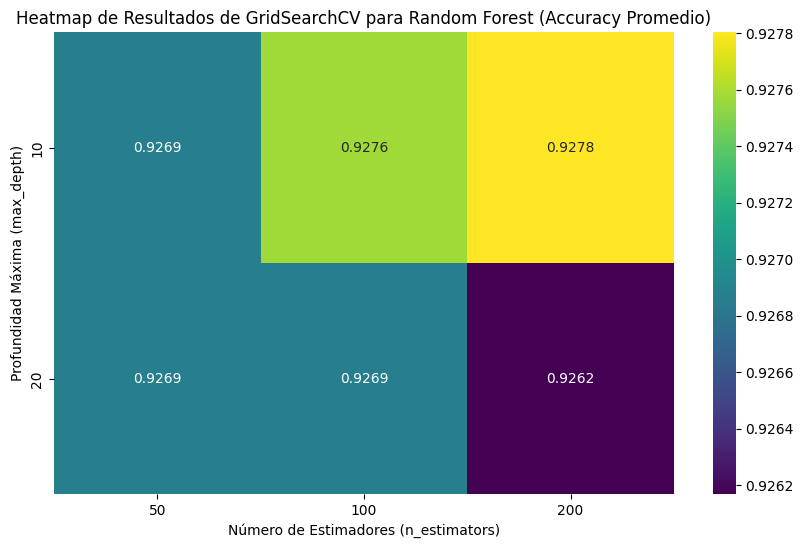

In [6]:
# --- Contendiente #1: Random Forest con GridSearchCV ---

# 1. Definir la parrilla de hiperparámetros a probar
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Número de árboles
    'max_depth': [None, 10, 20],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],         # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2]           # Mínimo de muestras en una hoja final
}

# 2. Crear el objeto GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid_rf,
                           cv=5,
                           n_jobs=-1,
                           verbose=2) # verbose=2 para ver el progreso

# 3. Ejecutar la búsqueda en los datos de entrenamiento
print("Iniciando la búsqueda de los mejores hiperparámetros para Random Forest...")
grid_search_rf.fit(X_train, y_train)

# 4. Mostrar los mejores parámetros encontrados
print("\nMejores hiperparámetros encontrados para Random Forest:")
print(grid_search_rf.best_params_)

# --- Evaluación del Modelo Random Forest Optimizado ---

# 5. Usar el mejor modelo encontrado para hacer predicciones
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# 6. Evaluar la precisión del modelo optimizado
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"\nPrecisión del Modelo Random Forest Optimizado: {accuracy_best_rf:.4f}")

# 7. Mostrar el Reporte de Clasificación del modelo optimizado
print("\nReporte de Clasificación (Random Forest Optimizado):")
print(classification_report(y_test, y_pred_best_rf, target_names=['Bajo', 'Alto']))

# --- Visualización de Resultados de GridSearchCV para Random Forest ---

# 8. Convertir los resultados a un DataFrame para fácil manejo
results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# 9. Crear una tabla pivot para visualizar el impacto de dos parámetros clave
pivot_table_rf = results_rf.pivot_table(values='mean_test_score',
                                  index='param_max_depth',
                                  columns='param_n_estimators')

# 10. Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_rf, annot=True, fmt=".4f", cmap="viridis")
plt.title('Heatmap de Resultados de GridSearchCV para Random Forest (Accuracy Promedio)')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Profundidad Máxima (max_depth)')
plt.show()


Iniciando la búsqueda de los mejores hiperparámetros para XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[10/05/25 14:53:42] WARNING  c:\Users\javie\Documents\GitHub\MedicalCostKedro-WorkInProgress\venv\L ]8;id=478620;file://C:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=738740;file://C:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\warnings.py#110\110]8;;\
                             ib\site-packages\xgboost\training.py:183: UserWarning: [14:53:42]                     
                             WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738:                  
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               bst.update(dtrain, iteration=i, fobj=obj)                                           
                                                                                                                   


Mejores hiperparámetros encontrados para XGBoost:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}

Precisión del Modelo XGBoost Optimizado: 0.9291

Reporte de Clasificación (XGBoost Optimizado):
              precision    recall  f1-score   support

        Bajo       0.90      0.96      0.93       134
        Alto       0.96      0.90      0.93       134

    accuracy                           0.93       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268



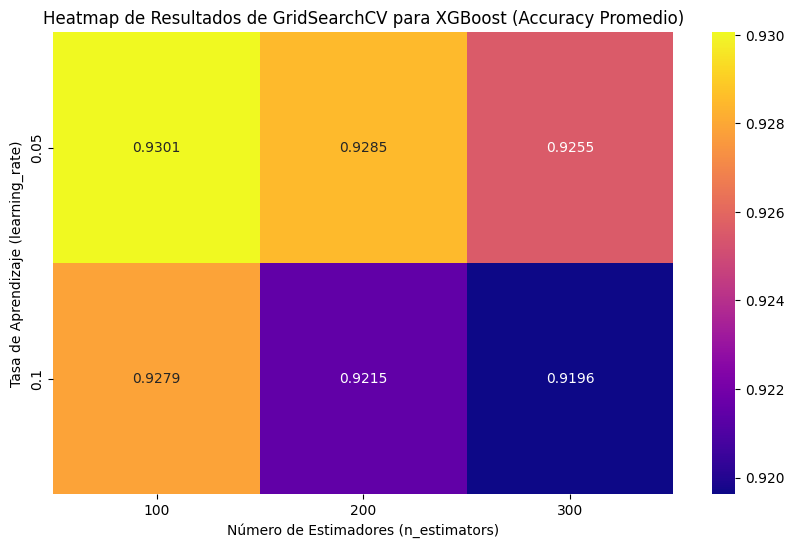

In [7]:
# --- Contendiente #2: XGBoost con GridSearchCV ---

# 1. Definir la parrilla de hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],     # Número de rondas de boosting (árboles)
    'max_depth': [3, 5, 7],              # Profundidad máxima de cada árbol
    'learning_rate': [0.05, 0.1],        # Tasa de aprendizaje, controla el peso de cada árbol
    'subsample': [0.8, 1.0]              # Fracción de datos a usar para entrenar cada árbol
}

# 2. Crear el objeto GridSearchCV para XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                               param_grid=param_grid_xgb,
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

# 3. Ejecutar la búsqueda en los datos de entrenamiento
print("\nIniciando la búsqueda de los mejores hiperparámetros para XGBoost...")
grid_search_xgb.fit(X_train, y_train)

# 4. Mostrar los mejores parámetros encontrados
print("\nMejores hiperparámetros encontrados para XGBoost:")
print(grid_search_xgb.best_params_)

# --- Evaluación del Modelo XGBoost Optimizado ---

# 5. Usar el mejor modelo para hacer predicciones
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# 6. Evaluar la precisión del modelo optimizado
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"\nPrecisión del Modelo XGBoost Optimizado: {accuracy_best_xgb:.4f}")

# 7. Mostrar el Reporte de Clasificación
print("\nReporte de Clasificación (XGBoost Optimizado):")
print(classification_report(y_test, y_pred_best_xgb, target_names=['Bajo', 'Alto']))

# --- Visualización de Resultados de GridSearchCV para XGBoost ---

# 8. Convertir los resultados a un DataFrame
results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)

# 9. Crear una tabla pivot para visualizar el impacto de dos parámetros clave
pivot_table_xgb = results_xgb.pivot_table(values='mean_test_score',
                                          index='param_learning_rate',
                                          columns='param_n_estimators')

# 10. Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_xgb, annot=True, fmt=".4f", cmap="plasma")
plt.title('Heatmap de Resultados de GridSearchCV para XGBoost (Accuracy Promedio)')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Tasa de Aprendizaje (learning_rate)')
plt.show()


Iniciando la búsqueda de los mejores hiperparámetros para SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Mejores hiperparámetros encontrados para SVC:
{'svc__C': 1, 'svc__gamma': 0.1}

Precisión del Modelo SVC Optimizado: 0.9254

Reporte de Clasificación (SVC Optimizado):
              precision    recall  f1-score   support

        Bajo       0.90      0.96      0.93       134
        Alto       0.95      0.90      0.92       134

    accuracy                           0.93       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268



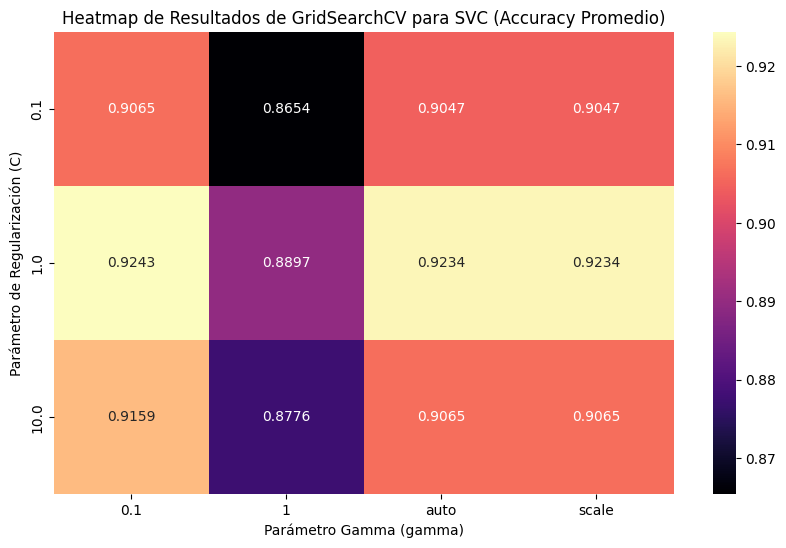

In [8]:
# --- Contendiente #3: Support Vector Classifier (SVC) con GridSearchCV ---

# 1. Crear una Pipeline
# Una pipeline encadena pasos. Aquí, primero escalará los datos y luego entrenará el SVC.
# Esto es CRUCIAL para modelos como SVC y evita la fuga de datos.
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42, probability=True)) # probability=True puede ser útil pero ralentiza un poco
])

# 2. Definir la parrilla de hiperparámetros para SVC
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.1, 1]
}

# 3. Crear y ejecutar GridSearchCV
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, n_jobs=-1, verbose=2)

print("\nIniciando la búsqueda de los mejores hiperparámetros para SVC...")
grid_search_svc.fit(X_train, y_train)

# 4. Mostrar los mejores parámetros
print("\nMejores hiperparámetros encontrados para SVC:")
print(grid_search_svc.best_params_)

# --- Evaluación del Modelo SVC Optimizado ---

# 5. Usar el mejor modelo para hacer predicciones
best_svc_model = grid_search_svc.best_estimator_
y_pred_best_svc = best_svc_model.predict(X_test)

# 6. Evaluar la precisión
accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)
print(f"\nPrecisión del Modelo SVC Optimizado: {accuracy_best_svc:.4f}")

# 7. Mostrar el Reporte de Clasificación
print("\nReporte de Clasificación (SVC Optimizado):")
print(classification_report(y_test, y_pred_best_svc, target_names=['Bajo', 'Alto']))

# --- Visualización de Resultados de GridSearchCV para SVC ---

# 8. Convertir los resultados a un DataFrame
results_svc = pd.DataFrame(grid_search_svc.cv_results_)

# 9. Crear la tabla pivot
pivot_table_svc = results_svc.pivot_table(values='mean_test_score',
                                          index='param_svc__C',
                                          columns='param_svc__gamma')

# 10. Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_svc, annot=True, fmt=".4f", cmap="magma")
plt.title('Heatmap de Resultados de GridSearchCV para SVC (Accuracy Promedio)')
plt.xlabel('Parámetro Gamma (gamma)')
plt.ylabel('Parámetro de Regularización (C)')
plt.show()

## Paso 5: El Veredicto Final y la Coronación del Campeón

Después de una rigurosa evaluación y optimización, los resultados finales hablaron por sí mismos.

| Modelo | Accuracy (Precisión Final) |
| :--- | :---: |
| Regresión Logística | 90.00% |
| Support Vector Classifier (SVC) | 92.54% |
| XGBoost | 92.91% |
| **Random Forest** | **94.03%** |

---

> El modelo **Random Forest optimizado** es el campeón indiscutible de este análisis, logrando la mayor precisión con un **94.03%**.

Este proyecto demuestra una lección clave en la ciencia de datos: el algoritmo más complejo no siempre es el mejor. La experimentación y la validación rigurosa son esenciales para descubrir la solución óptima para un problema específico.

Hemos concluido con una herramienta de clasificación de alto rendimiento, capaz de identificar con gran fiabilidad a los pacientes que probablemente incurrirán en altos costos, permitiendo así intervenciones más efectivas y proactivas.